## Analysis using the new data

In [3]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [4]:
a = pd.read_csv("../data/trainingdata_timed.csv")

In [5]:
print(a.keys())

Index(['published', 'collection', 'nauthors', 'numcit', 'influcit',
       'topic.Genomics', 'topic.Epidemiology', 'topic.Chest X-Ray',
       'topic.Healthcare', 'topic.Clinics', 'topic.Drug discovery', 'DL_Pdf',
       'DL_Full', 'DL_Abstract', 'sum.npapers', 'sum.infCit', 'mean.npapers',
       'mean.infCit', 'max.npapers', 'max.infCit', '2020-01-28', '2020-02-28',
       '2020-03-28', '2020-04-28', '2020-05-28', '2020-06-28', '2020-07-28',
       '2020-08-28', '2020-09-28'],
      dtype='object')


In [6]:
print(a.published.shape)

(348,)


In [7]:
a.head()

,published,collection,nauthors,numcit,influcit,topic.Genomics,topic.Epidemiology,topic.Chest X-Ray,topic.Healthcare,topic.Clinics,...,max.infCit,2020-01-28,2020-02-28,2020-03-28,2020-04-28,2020-05-28,2020-06-28,2020-07-28,2020-08-28,2020-09-28
0,1,1,1,0.092437,0.004202,0.001772,0.827240,0.001772,0.165671,0.001772,...,4,0,0,0,0,0,0,0,0,0
1,1,1,2,0.527919,0.050761,0.001415,0.001415,0.905223,0.001415,0.089116,...,7,0,0,0,0,0,0,0,0,0
2,1,1,2,0.021390,0.000000,0.001226,0.833410,0.001226,0.001226,0.001226,...,35,0,0,0,0,0,0,0,0,0
3,1,1,9,0.400000,0.032432,0.001081,0.001081,0.609501,0.212437,0.174820,...,255,0,0,0,0,0,0,0,0,0
4,0,1,4,0.059783,0.005435,0.001107,0.994466,0.001107,0.001107,0.001107,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X, y = a[['collection', 'nauthors', 'numcit', 'influcit',
       'topic.Genomics', 'topic.Epidemiology', 'topic.Chest X-Ray',
       'topic.Healthcare', 'topic.Clinics', 'topic.Drug discovery', 'DL_Pdf',
       'DL_Full', 'DL_Abstract', 'sum.npapers', 'sum.infCit', 'mean.npapers',
       'mean.infCit', 'max.npapers', 'max.infCit', '2020-01-28', '2020-02-28',
       '2020-03-28', '2020-04-28', '2020-05-28', '2020-06-28', '2020-07-28',
       '2020-08-28', '2020-09-28']],a.published

In [18]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [20]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

[16:34:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10)

In [21]:
preds = xg_reg.predict(X_test)

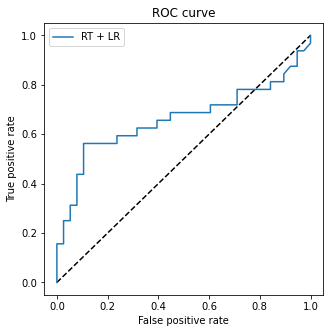

AUC is :0.6603618421052633


<Figure size 360x360 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, preds)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('new_data_roc.png', dpi=100)

print("AUC is :" + str(auc(fpr_rt_lm, tpr_rt_lm)))

<Figure size 360x360 with 0 Axes>

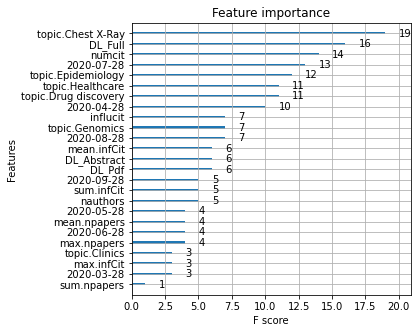

<Figure size 360x360 with 0 Axes>

In [28]:
plt.figure()
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('new_data_feature_importance.png', dpi=100)